In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score

In [2]:
# Load your dataset 
data = pd.read_csv(r'C:\Users\shame\3D Objects\Ammonia Detection/Ammonia Dataset  523.csv')

In [3]:
data.tail(5)

,Inlet Pressure (kg/cm2),Outlet Pressure (kg/cm2),Differential Pressure,T1,T2,T3,Recycle Flow(nm3/hr),Make-up Flow(nm3/hr),Syngas Comp RPM,% Of H2,% of N2,% of CH4,% of Ammonia,% of Ar,Target
518,205.49,200,5.50,518,466,467,370000.0,125000.0,11958,61.92,23.56,7.52,3.41,3.60,1
519,199.99,195,5.00,518,464,465,365000.0,112000.0,11801,61.95,23.87,7.35,3.56,3.24,0
520,205.70,200,5.68,519,466,467,370000.0,125000.0,11958,61.31,24.24,7.51,3.40,3.56,1
521,205.52,200,5.50,519,465,466,365000.0,120000.0,11881,62.42,22.41,7.81,3.60,3.76,1
522,200.32,195,5.31,520,466,467,365000.0,120000.0,11880,61.82,23.15,7.73,3.48,3.77,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Inlet Pressure (kg/cm2)   523 non-null    float64
 1   Outlet Pressure (kg/cm2)  523 non-null    int64  
 2   Differential Pressure     523 non-null    float64
 3   T1                        523 non-null    int64  
 4   T2                        523 non-null    int64  
 5   T3                        523 non-null    int64  
 6   Recycle Flow(nm3/hr)      523 non-null    float64
 7   Make-up Flow(nm3/hr)      523 non-null    float64
 8   Syngas Comp RPM           523 non-null    int64  
 9   % Of H2                   523 non-null    float64
 10  % of N2                   523 non-null    float64
 11  % of CH4                  523 non-null    float64
 12  % of Ammonia              523 non-null    float64
 13  % of Ar                   523 non-null    float64
 14  Target    

In [5]:
data=data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 523 entries, 0 to 522
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Inlet Pressure (kg/cm2)   523 non-null    float64
 1   Outlet Pressure (kg/cm2)  523 non-null    int64  
 2   Differential Pressure     523 non-null    float64
 3   T1                        523 non-null    int64  
 4   T2                        523 non-null    int64  
 5   T3                        523 non-null    int64  
 6   Recycle Flow(nm3/hr)      523 non-null    float64
 7   Make-up Flow(nm3/hr)      523 non-null    float64
 8   Syngas Comp RPM           523 non-null    int64  
 9   % Of H2                   523 non-null    float64
 10  % of N2                   523 non-null    float64
 11  % of CH4                  523 non-null    float64
 12  % of Ammonia              523 non-null    float64
 13  % of Ar                   523 non-null    float64
 14  Target    

In [6]:
# Checking for missing value
data.isnull().sum()

Inlet Pressure (kg/cm2)     0
Outlet Pressure (kg/cm2)    0
Differential Pressure       0
T1                          0
T2                          0
T3                          0
Recycle Flow(nm3/hr)        0
Make-up Flow(nm3/hr)        0
Syngas Comp RPM             0
% Of H2                     0
% of N2                     0
% of CH4                    0
% of Ammonia                0
% of Ar                     0
Target                      0
dtype: int64

In [7]:
# Statistical measures about the data
data.describe()

,Inlet Pressure (kg/cm2),Outlet Pressure (kg/cm2),Differential Pressure,T1,T2,T3,Recycle Flow(nm3/hr),Make-up Flow(nm3/hr),Syngas Comp RPM,% Of H2,% of N2,% of CH4,% of Ammonia,% of Ar,Target
count,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000,523.000000
mean,199.516845,194.311663,5.205220,518.089866,465.139579,465.837476,365021.032394,120005.736071,11834.579350,62.029675,23.535927,7.441549,3.445870,3.546960,0.217973
std,4.577279,4.365091,0.302276,0.993057,1.081728,0.999219,3746.459878,3762.841152,65.761112,0.966305,1.084218,0.191310,0.146884,0.271605,0.413264
min,189.590000,185.000000,4.490000,516.000000,463.000000,464.000000,354999.975100,109999.986600,11658.000000,59.740000,21.350000,6.940000,3.070000,3.200000,0.000000
25%,195.100000,190.000000,5.000000,517.000000,464.000000,465.000000,364999.983250,119999.981350,11801.000000,61.255000,22.790000,7.300000,3.390000,3.260000,0.000000
50%,200.090000,195.000000,5.200000,518.000000,465.000000,466.000000,365000.000000,120000.000100,11880.000000,62.000000,23.550000,7.420000,3.480000,3.590000,0.000000
75%,203.410000,198.000000,5.500000,519.000000,466.000000,467.000000,369999.977400,124999.979100,11881.000000,62.730000,24.305000,7.575000,3.580000,3.780000,0.000000
max,205.910000,200.000000,5.900000,521.000000,468.000000,468.000000,370000.025000,125000.027700,11958.000000,64.310000,26.370000,7.910000,3.630000,4.020000,1.000000


Target
0    409
1    114
Name: count, dtype: int64


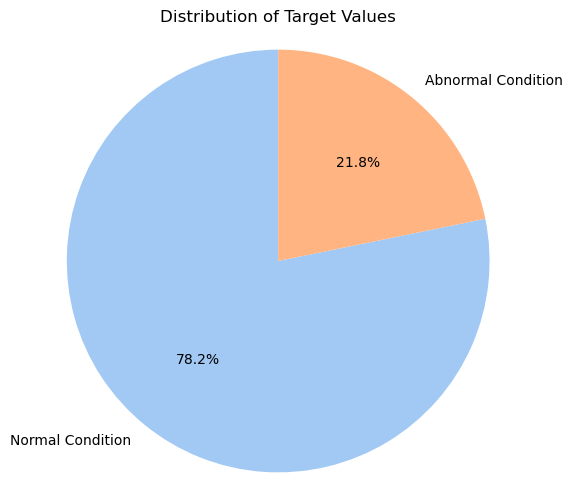

In [8]:
# Checking the distribution of target values
target_counts = data['Target'].value_counts()
print(target_counts)

# Mapping 1 -> 'Abnormal Condition' and 0 -> 'Normal Condition'
labels = target_counts.index.map({1: 'Abnormal Condition', 0: 'Normal Condition'})

# Plot pie chart for target value distribution
plt.figure(figsize=(6, 6))
plt.pie(target_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("pastel"))
plt.title('Distribution of Target Values')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is drawn as a circle.
plt.show()

<Axes: >

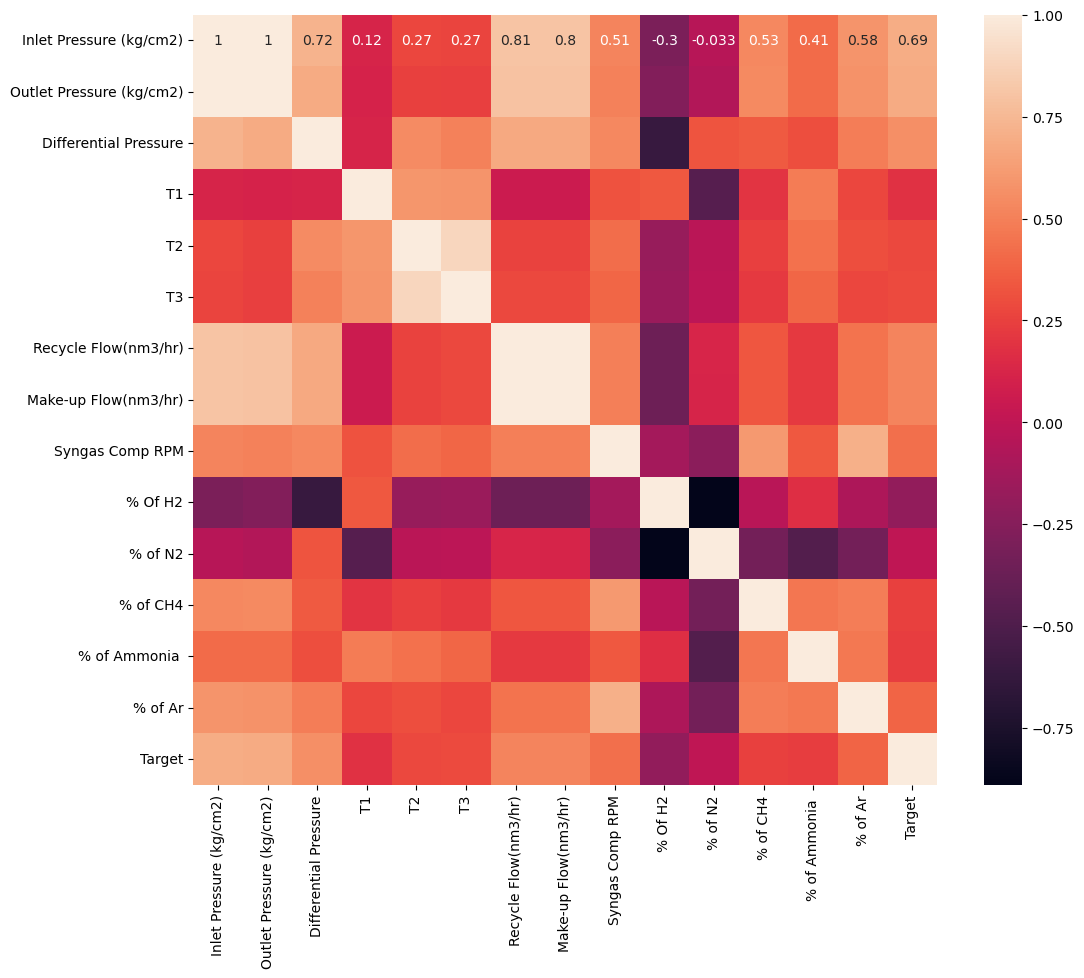

In [9]:
correlation = data.corr()
plt.subplots(figsize=(12,10))
sns.heatmap(correlation, xticklabels= correlation.columns, yticklabels=correlation.columns,annot=True)

C:\Users\shame\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shame\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shame\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\shame\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

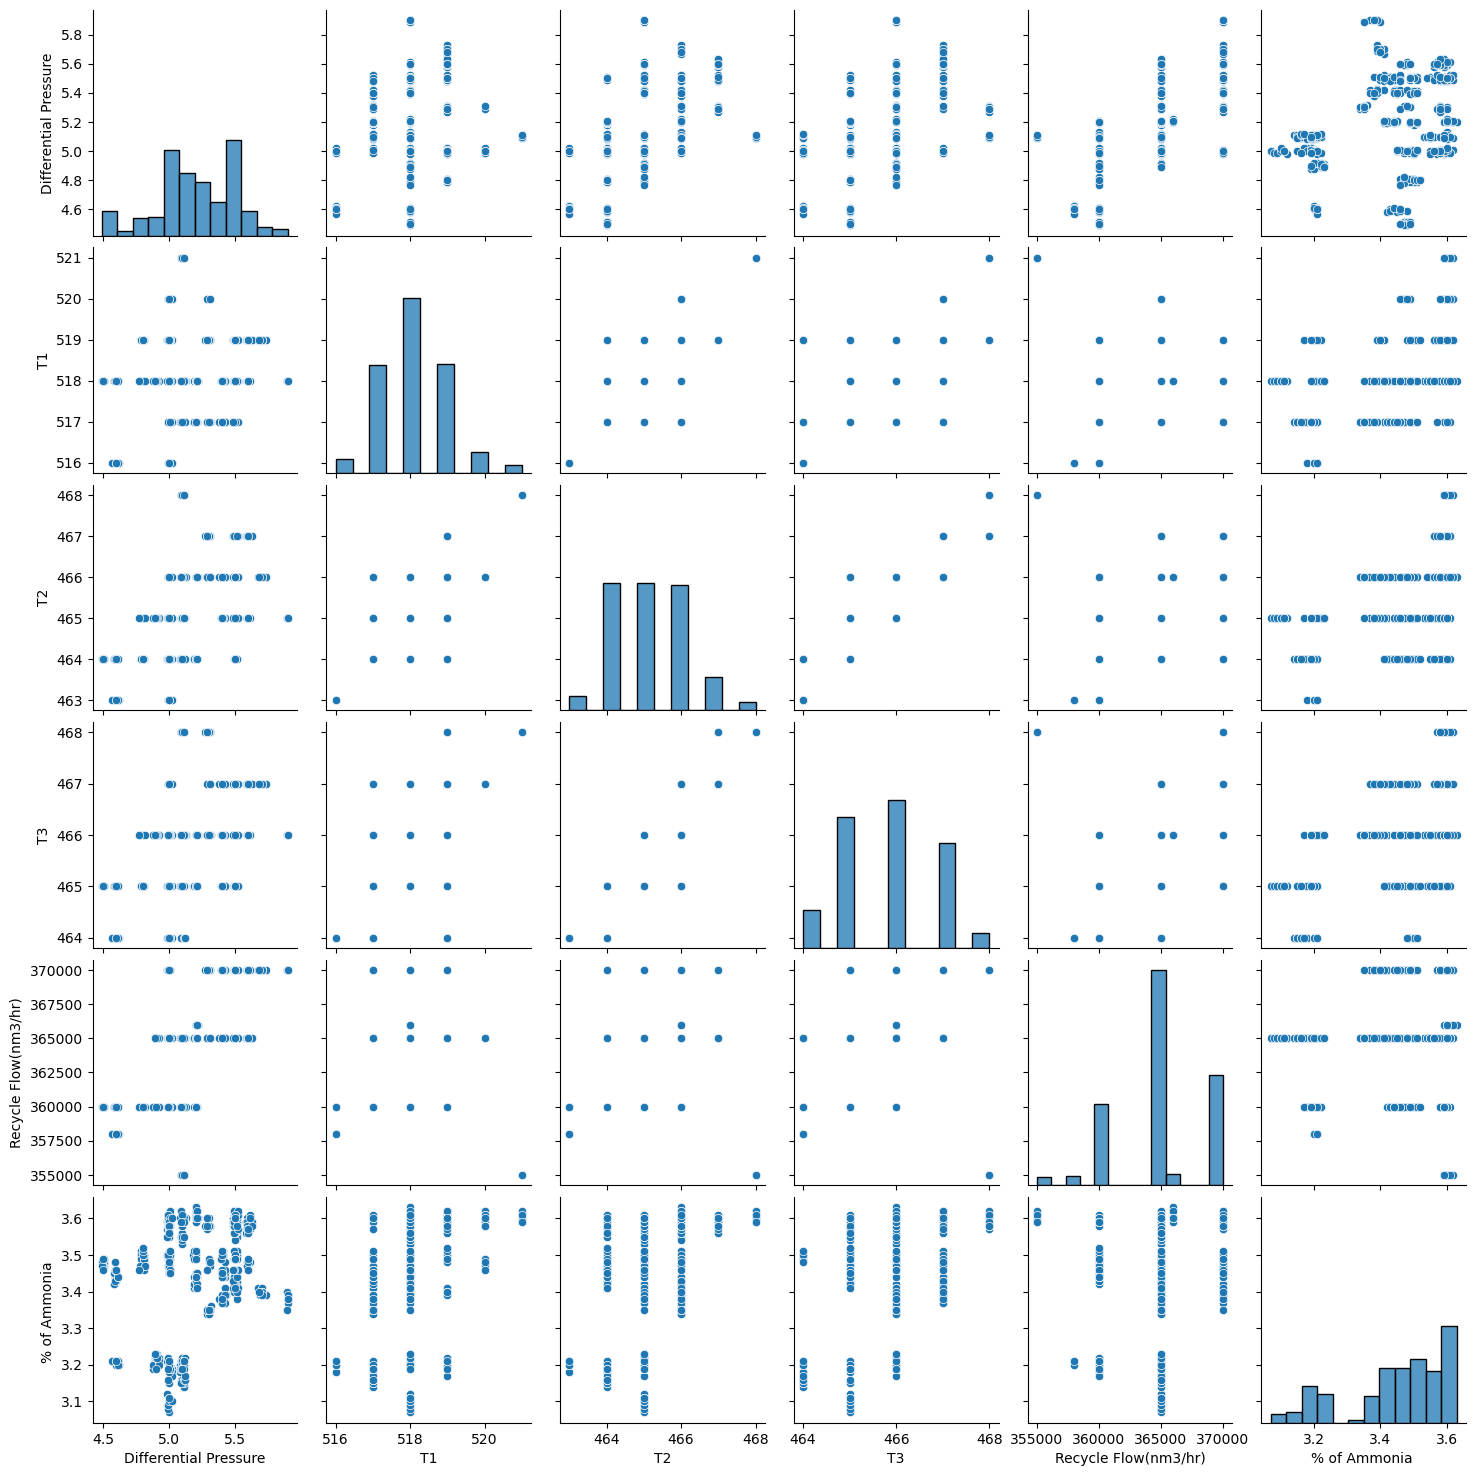

In [10]:
dataset_Pair_Plot = data[['Differential Pressure','T1','T2','T3','Recycle Flow(nm3/hr)','% of Ammonia ']]
print(sns.pairplot(dataset_Pair_Plot))

In [11]:
X = data.drop(columns=['Target'],axis=1)
Y = data['Target']

In [12]:
# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [13]:
# Standardize the data (fit on train, transform both train and test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# Define the Gaussian Naive Bayes model
fault_detector = GaussianNB()
fault_detector.fit(X_train, Y_train)

GaussianNB()

In [15]:
# Define the parameter grid for var_smoothing
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=100)
}
# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=fault_detector, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
# Fit the model on the training data
grid_search.fit(X_train, Y_train)

# Output the best parameters and the corresponding accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search.best_score_:.4f}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'var_smoothing': 0.01519911082952933}
Best Cross-Validation Accuracy: 1.0000


Test Set Accuracy with Best var_smoothing=0.01519911082952933: 1.0000
Accuracy on training data: 1.0
Accuracy on test data: 1.0
Classification Report for Training Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       324
           1       1.00      1.00      1.00        94

    accuracy                           1.00       418
   macro avg       1.00      1.00      1.00       418
weighted avg       1.00      1.00      1.00       418

Classification Report for Test Data:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        20

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105

AUC for Test Data: 1.0
Confusion Matrix:
 [[85  0]
 [ 0 20]]


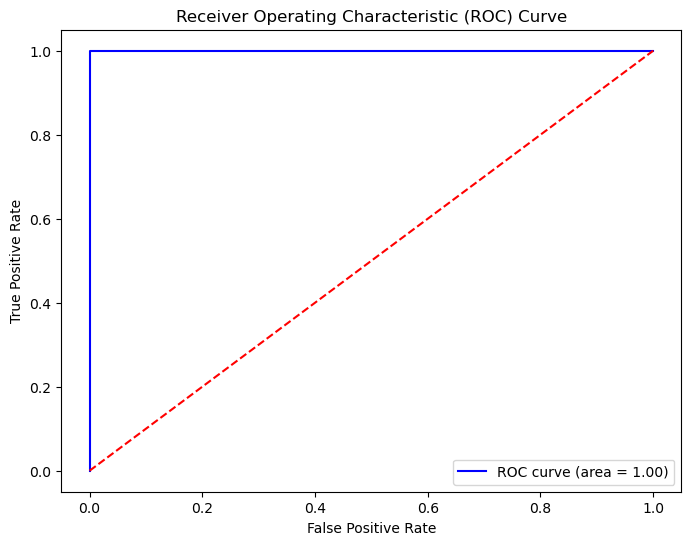

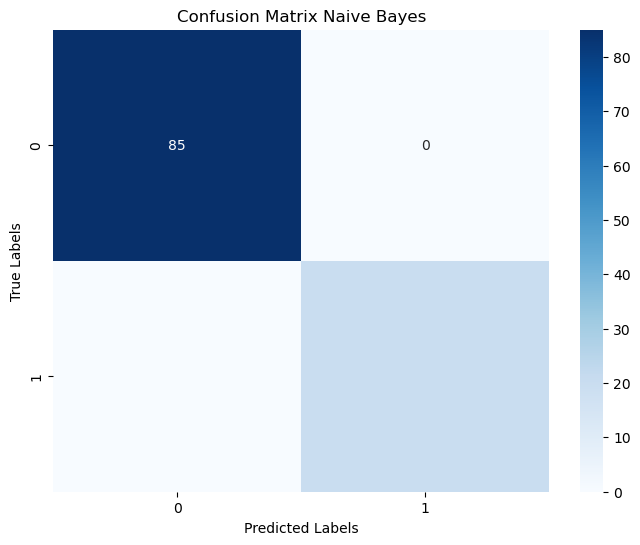

In [16]:
# Define the Gaussian Naive Bayes model with the best var_smoothing parameter
best_var_smoothing = 0.01519911082952933  # The best parameter you found
fault_detector = GaussianNB(var_smoothing=best_var_smoothing)

# Train the model on the training data
fault_detector.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = fault_detector.predict(X_test)

# Calculate and print the accuracy on the test set
accuracy = accuracy_score(Y_test, y_pred)
print(f"Test Set Accuracy with Best var_smoothing={best_var_smoothing}: {accuracy:.4f}")

# accuracy on training data
X_train_prediction=fault_detector.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)
print('Accuracy on training data:',training_data_accuracy)
# accuracy on test data
X_test_prediction=fault_detector.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy on test data:',test_data_accuracy)
# Generate classification report for training data
train_classification_report = classification_report(Y_train, X_train_prediction)
print("Classification Report for Training Data:\n", train_classification_report)
# Generate classification report for test data
test_classification_report = classification_report(Y_test, X_test_prediction)
print("Classification Report for Test Data:\n", test_classification_report)


# Compute AUC value
test_auc = roc_auc_score(Y_test, y_pred)
print("AUC for Test Data:", test_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(Y_test, y_pred)


# Confusion Matrix for test data
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % test_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Plot the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title('Confusion Matrix Naive Bayes')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

C:\Users\shame\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\shame\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\shame\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\shame\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\shame\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\shame\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

Classification Report for Test Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       119
           1       1.00      1.00      1.00        38

    accuracy                           1.00       157
   macro avg       1.00      1.00      1.00       157
weighted avg       1.00      1.00      1.00       157



C:\Users\shame\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\shame\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\shame\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\shame\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\shame\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



Cross-Validation Accuracy: 1.0


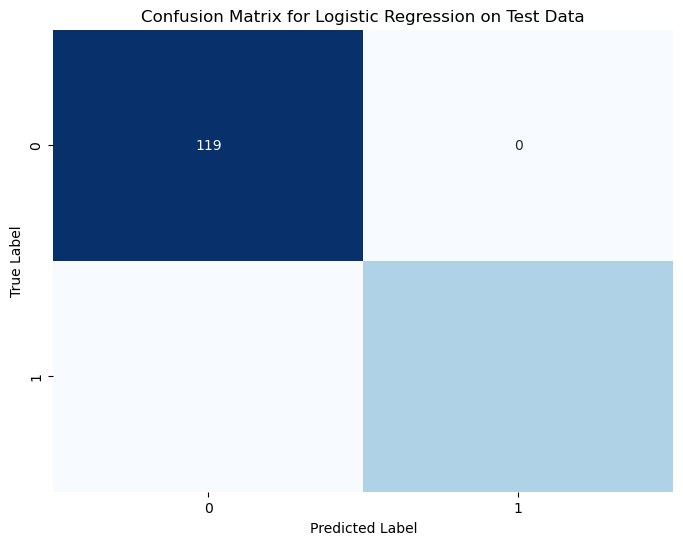

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data_path = r'C:\Users\shame\3D Objects\Ammonia Detection/Ammonia Dataset  523.csv'
dataset = pd.read_csv(data_path)

# Prepare features and target
X = dataset.drop('Target', axis=1)
y = dataset['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # Regularization types
    'solver': ['liblinear']  # Suitable solver for small datasets with l1 and l2 penalty
}

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_log_reg = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_log_reg.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))

# Cross-Validation Score
cv_scores = cross_val_score(best_log_reg, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy:", cv_scores.mean())

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for Logistic Regression on Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
data_path = r'C:\Users\shame\3D Objects\Ammonia Detection/Ammonia Dataset  523.csv'
dataset = pd.read_csv(data_path)

# Prepare features and target
X = dataset.drop('Target', axis=1)
y = dataset['Target']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the parameter grid for SVM
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
    'gamma': ['scale', 'auto']  # Kernel coefficient for ‘rbf’
}

# Initialize the SVM model
svm_model = SVC()

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_svm = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_svm.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report for Test Data:")
print(classification_report(y_test, y_pred))

# Cross-Validation Score
cv_scores = cross_val_score(best_svm, X, y, cv=5, scoring='accuracy')
print("\nCross-Validation Accuracy:", cv_scores.mean())

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix for SVM on Test Data")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()